In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import scipy.misc
import scipy.io
import random

#-------------------------------------------------------------------------------
# train
train_images = []
tlabels = []

for num in range(1,701):
    train_images.append(scipy.misc.imread('train_image/train_'+ str(num)+'.bmp'))


with open("train_label.txt") as f:
    line = [line.rstrip() for line in f]
    tlabels.append(line)

train_images = np.array(train_images)
train_images = train_images.reshape(700, 2200, )

tlabels = np.array(tlabels)     # tlabels = (1,700)
tlabels = tlabels.reshape(700,1)

train_labels  = np.array(np.zeros(70000).reshape(700,100))
for num in range(0,700):
    train_labels[num][int(tlabels[num][0]) - 1] = 1

#-----------------------------------------------------------------
# test
test_images = []
testlabels = []

for num in range(1,701):
    test_images.append(scipy.misc.imread('test_image/test_'+ str(num)+'.bmp'))


with open("test_label.txt") as f:
    line = [line.rstrip() for line in f]
    testlabels.append(line)


test_images = np.array(test_images)
test_images = test_images.reshape(700, 2200, )

testlabels = np.array(testlabels)     # tlabels = (1,700)
testlabels = testlabels.reshape(700,1)

test_labels  = np.array(np.zeros(70000).reshape(700,100))
for num in range(0,700):
    test_labels[num][int(testlabels[num][0]) - 1] = 1


#------------------------------------------------------------------

train_images = train_images / 255.
test_images = test_images / 255.

_num_examples = 700
_index_in_epoch = 0
_images = train_images
_labels = train_labels
_epochs_completed = 0

def next_batch(batch_size):
    """Return the next `batch_size` examples from this data set."""
    global _index_in_epoch
    global _images
    global _labels
    global _epochs_completed

    start = _index_in_epoch
    _index_in_epoch += batch_size

    if _index_in_epoch > _num_examples:
      # Finished epoch
      _epochs_completed += 1

      # Shuffle the data
      perm = np.arange(_num_examples)
      np.random.shuffle(perm)
      _images = _images[perm]
      _labels = _labels[perm]

      # Start next epoch
      start = 0
      _index_in_epoch = batch_size
      assert batch_size <= _num_examples

    end = _index_in_epoch
    return _images[start:end], _labels[start:end]





In [16]:
x = tf.placeholder("float32", [None, 2200]) # mnist data image of shape 55 x 40 = 2200
y = tf.placeholder("float32", [None, 100]) 

W = tf.Variable(tf.zeros([2200,100]))
b = tf.Variable(tf.zeros([100]))
yy = tf.nn.softmax(tf.matmul(x, W) + b)



#cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(cost), reduction_indices = 1))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yy))

learning_rate = 0.5
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

trainig_epochs = 10000
display_step = 500
batch_size = 50



In [17]:
# training_epoch 횟수만큼 반복해서 학습한다
for epoch in range(trainig_epochs):
	avg_cost = 0.
	total_batch = int(_num_examples/batch_size)

	for i  in range(total_batch):
		batch_xs, batch_ys = next_batch(batch_size)
		#print(batch_xs[0])
		#print(batch_ys[0])
		sess.run(optimizer, feed_dict={x: batch_xs, y:batch_ys})
		avg_cost += sess.run(cost, feed_dict={x: batch_xs, y:batch_ys}) / total_batch

	if epoch % display_step == 0:
		print ("Epoch:", '%04d' % (epoch +1) , "cost=", "{:.9f}".format(avg_cost))

print ("Optimization Finished")



Epoch: 0001 cost= 4.604614905
Epoch: 0501 cost= 4.301261357
Epoch: 1001 cost= 4.240906034
Epoch: 1501 cost= 4.200702054
Epoch: 2001 cost= 4.161071096
Epoch: 2501 cost= 4.110833747
Epoch: 3001 cost= 4.100320952
Epoch: 3501 cost= 4.060961298
Epoch: 4001 cost= 4.060320105
Epoch: 4501 cost= 4.031069466
Epoch: 5001 cost= 4.011517712
Epoch: 5501 cost= 3.981206911
Epoch: 6001 cost= 3.962731140
Epoch: 6501 cost= 3.941539901
Epoch: 7001 cost= 3.931059650
Epoch: 7501 cost= 3.921033519
Epoch: 8001 cost= 3.901943650
Epoch: 8501 cost= 3.901177781
Epoch: 9001 cost= 3.881349495
Epoch: 9501 cost= 3.869033882
Optimization Finished


In [18]:
# 정답률을 계산한다  yy  vs  y
correct_prediction = tf.equal(tf.argmax(yy, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict= {x: test_images, y: test_labels}))

0.764286


Label:  [9]
Prediction:  [9]


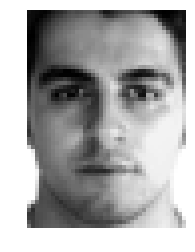

In [28]:
# 임의의 얼굴 하나를 출력한 다음 맞혀보는 코드 
r = random.randint(0, _num_examples -1)
print ("Label: ", sess.run(tf.argmax(test_labels[r:r+1], 1)))
print ("Prediction: ", sess.run(tf.argmax(yy, 1), {x:test_images[r:r+1]}))

plt.imshow(test_images[r:r+1].reshape(55, 40), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()